In [113]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [114]:
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")


In [116]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [117]:

# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [126]:
np.shape(xtrain)

(209, 64, 64, 3)

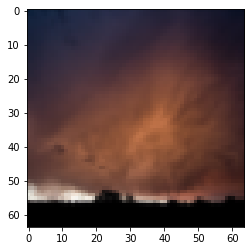

In [127]:
plt.imshow(xtrain[208])

In [128]:
np.shape(xtrain[0])

(64, 64, 3)

In [131]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [133]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [143]:
len(xtrain_[208])

12288

In [144]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]} 
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]) 
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topologia de la red.

1. Construir un algorítmo que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa:

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

activation=[None, relu, relu, relu, ...,sigmoid]

  - $\mathrm{n_x}$: valores de entrada
  - $\mathrm{n_{h1}}$: hidden layer 1 
  - $\mathrm{n_{h2}}$: hidden layer 2
  - $\mathrm{n_y}$: last layer 



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial 
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.

4. Construir un codigo que permita realizar el BackwardPropagation 


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} A^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) A^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) 
\end{equation}


Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$



\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]) 
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]} \times m$ 
\\

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]} \times ?$




In [149]:
import numpy as np
import sympy as sp

In [152]:
m = 2*np.random.random((2, 2)) - 1

In [153]:
sp.Matrix(m)

Matrix([
[ 0.689635275897323,  0.336265430727984],
[-0.157021199624723, -0.527084420261718]])

In [329]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Z):
    self.A = A
    self.Z = Z


def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    return f(x)
  
  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"


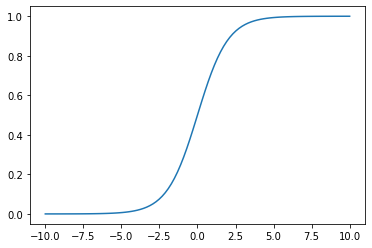

In [330]:
x = np.linspace(-10, 10, 100)
plt.plot(x, activation_function("sigmoid", x))

In [331]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]

In [332]:
l1 = layer_nn("sigmoid",3, nx)

In [333]:
l2 = layer_nn("sigmoid", 4, 3)

In [334]:
l3 = layer_nn("sigmoid", 7, 4)

In [335]:
l4 = layer_nn("sigmoid",1, 7)

In [336]:
# Incializacion de la arquitectura de la red 
red_nn = [l1, l2, l3, l4]

In [337]:
# Valores iniciales 
A0 = xtrain_.T

In [338]:
#np.shape(l1.theta)

In [339]:
np.shape(l1.theta@A0)

(3, 209)

In [340]:
np.shape(l1.theta@A0 )

(3, 209)

In [343]:
np.shape(l1.b.repeat(209, axis = 1))

(3, 209)

# layer 1

In [353]:
Z1 = l1.theta@A0 + l1.b
A1 = activation_function(l1.func_acti, Z1)

# layer 2

In [350]:
Z2 = l2.theta@A1 + l2.b
A2 = activation_function(l2.func_acti, Z2)

# layer 3

In [354]:
Z3 = l3.theta@A2 + l3.b
A3 = activation_function(l3.func_acti, Z3)

# layer 4

In [355]:
Z4 = l4.theta@A3 + l4.b
A4 = activation_function(l4.func_acti, Z4)

In [357]:
np.shape(A4)

(1, 209)

In [359]:
A4[0]

array([0.70819859, 0.7013293 , 0.70093777, 0.70592825, 0.70909283,
       0.70598628, 0.70095029, 0.70594478, 0.70074758, 0.70440925,
       0.70093777, 0.70099486, 0.7043786 , 0.70489675, 0.70221049,
       0.70093233, 0.70232833, 0.69913023, 0.70135374, 0.70488731,
       0.70465225, 0.70251842, 0.70093984, 0.69951307, 0.70093778,
       0.70104703, 0.70093764, 0.70599602, 0.70520334, 0.70489155,
       0.70371334, 0.70489646, 0.69912988, 0.70095008, 0.70411113,
       0.70782814, 0.70378146, 0.7048407 , 0.70825094, 0.69935381,
       0.7045415 , 0.70610413, 0.69921983, 0.70094292, 0.69923774,
       0.69920735, 0.7060087 , 0.70420659, 0.70599738, 0.71049867,
       0.70093239, 0.70297026, 0.70181234, 0.7045131 , 0.70371439,
       0.69912987, 0.7048503 , 0.70660519, 0.7048135 , 0.70473289,
       0.7058673 , 0.70093779, 0.7036218 , 0.70093781, 0.704914  ,
       0.70337545, 0.70487895, 0.70093722, 0.7103204 , 0.70049764,
       0.70445642, 0.70530239, 0.69918747, 0.69922591, 0.71038